
# Face Recognition using Principal Component Analysis


#### Import Libraries

In [1]:
from PIL import Image
import random
import numpy as np
from numpy import asarray
import os
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
from sklearn.metrics import accuracy_score

### 1. Loading Dataset and Dividing to Train-Test Splits
#### This code defines a function, TrainTestSplits, that splits a dataset of images into training and testing sets based on a specified trainSize ratio. Here’s a breakdown of its functionality:

In [5]:
def TrainTestSplits(folderName,trainSize):
    Folders = []
    for folders in os.listdir(folderName):
        if folders[0] == 's':
            Folders.append(folders)


    firstX = 1
    firstY = 1
    Y_train = []
    Y_test = []
    
    for folder in Folders:
        loc = folderName+"/"+folder
        count = 0
        folnum = int(folder[1:])
        for file in os.listdir(loc):
            fileLocation = loc + "/" + file
            image = Image.open(fileLocation)
            pixels = asarray(image)
            pixels = np.reshape(pixels,[1,pixels.shape[0]*pixels.shape[1]])

            if(count < trainSize):
                if(firstX):
                    X_train = pixels
                    firstX = 0
                else:
                    X_train = np.vstack([X_train,pixels])
                Y_train.append(folnum)
            else:
                if(firstY):
                    X_test = pixels
                    firstY = 0
                else:
                    X_test = np.vstack([X_test,pixels])
                Y_test.append(folnum)


            count = count + 1

    return X_train,Y_train,X_test,Y_test

In [6]:
X_train,Y_train,X_test,Y_test = TrainTestSplits("./Face Dataset",6)

### 2. Implementation of  PCA Algorithm.

In [12]:


def topPrincipalComponents(eigen_values, eigen_faces, num_of_components):
    # Select the top 'num_of_components' principal components (eigenfaces)
    ef = eigen_faces[:, :num_of_components]
    return ef

def principalComponentAnalysis(X):
    # Step 1: Calculate the covariance matrix of X

    # Standardize by subtracting the mean for each feature (column)
    global all_means
    all_means = np.mean(X, axis=0)
    X = X - all_means

    # Step 2: Compute the covariance matrix
    coVar = np.cov(X.T)

    # Step 3: Find eigenvalues and eigenvectors of the covariance matrix
    values, vectors = eigh(coVar)

    # Sort eigenvectors by eigenvalues in descending order
    sorted_index = (-values).argsort()
    sorted_eigen_faces = vectors[:, sorted_index]

    return values, sorted_eigen_faces

# Run PCA on the training images
eigen_values, eigen_faces = principalComponentAnalysis(X_train)


### Implement Image Reconstruction from Eigenfaces

In [16]:
# Function to implement image reconstruction by taking arguements as necessary.
def imageReconstruction(row,all_means,ef,Y_train,img_num,cmp,j,tmp):
    # Subtracting data point from Mean(Column)
    row = row - all_means
    
    # Matrix Multiplication with eigen faces
    xk = np.matmul(row,ef)
    
    row = np.matmul(xk,ef.T)
    
    #Adding back the mean subtracted
    row = row + all_means
    
    #Reshaping it to get actual image dimension
    row = np.reshape(row,[112,92])
    
    # Plotting
    plt.subplot(6,6,tmp+1)
    
    plt.imshow(row)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    if(j == 5):
        print('Face Number: '+str(img_num))
        plt.show()
        
    img = Y_train[img_num]

  

### Visualization of Mean Eigen Faces

C:\Users\JANAH\AppData\Local\Temp\ipykernel_16260\1703327224.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=pyplot.subplots(1,1,figsize=(6,6))


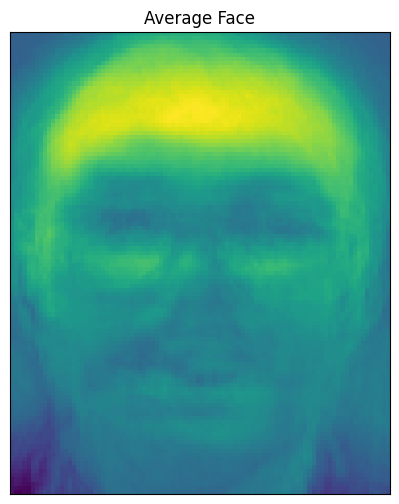

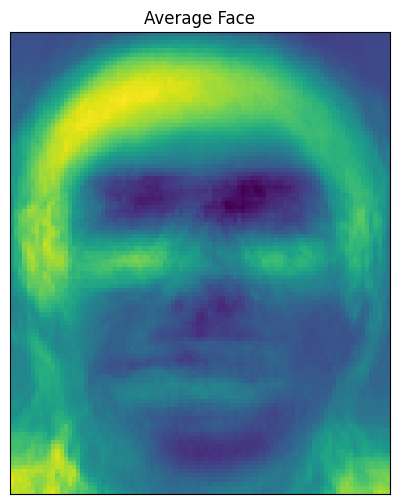

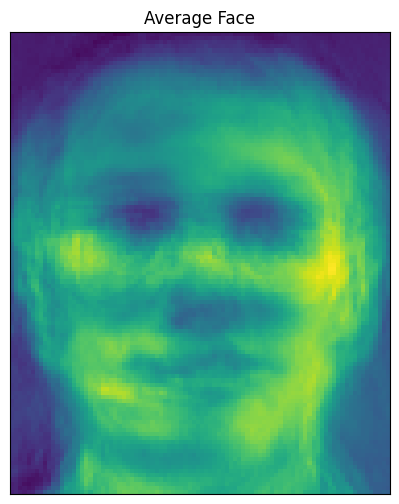

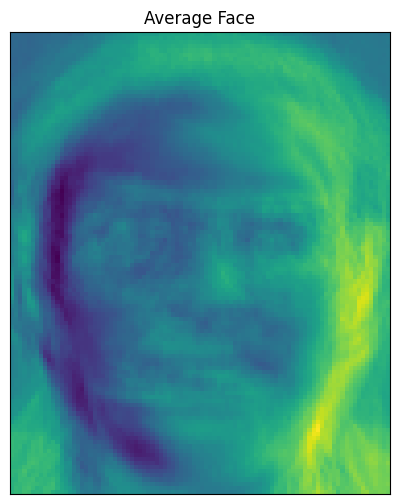

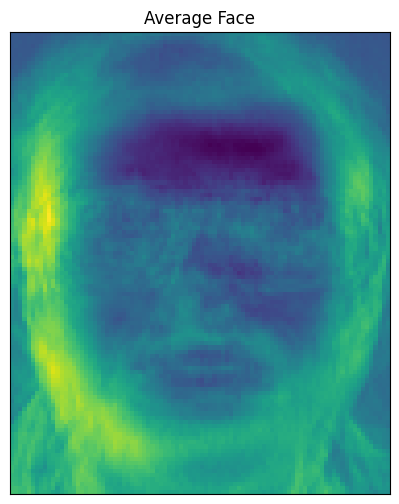

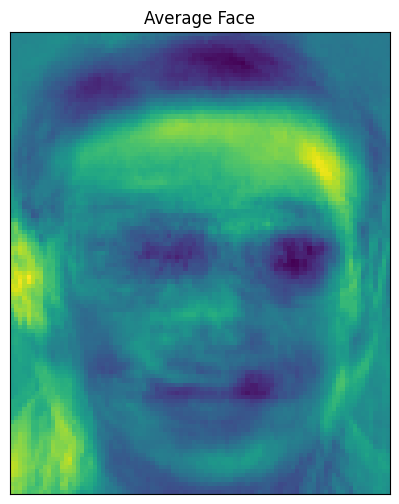

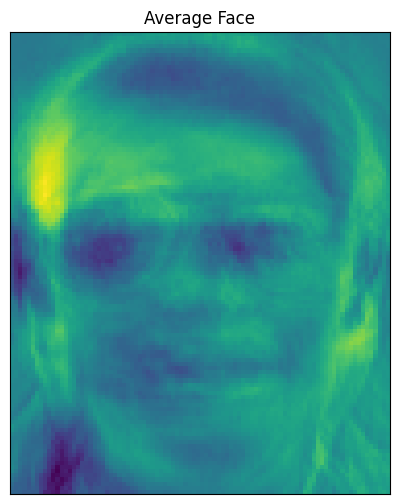

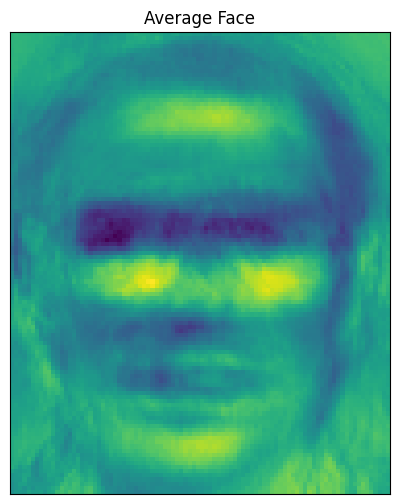

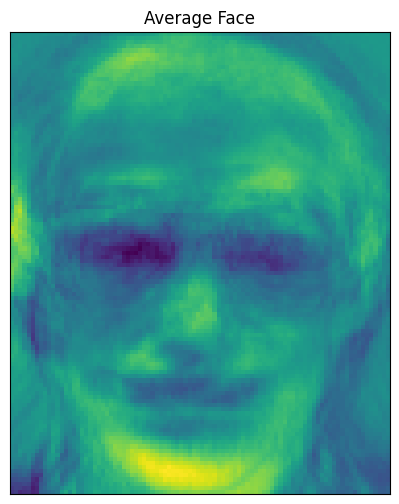

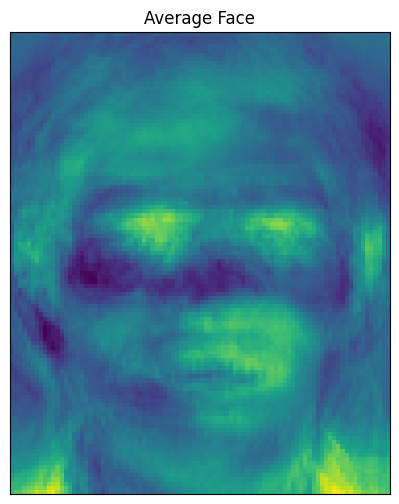

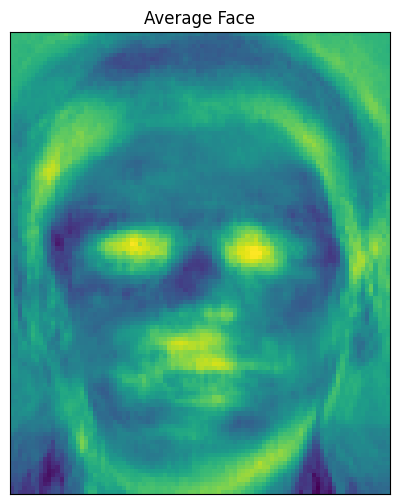

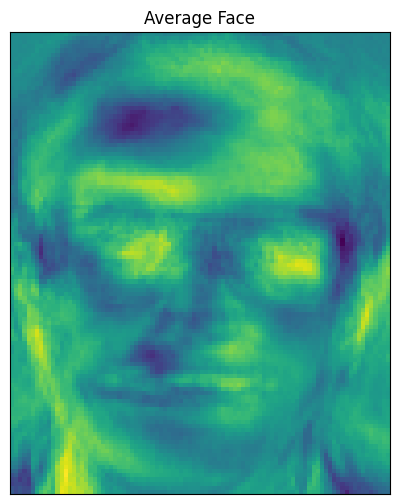

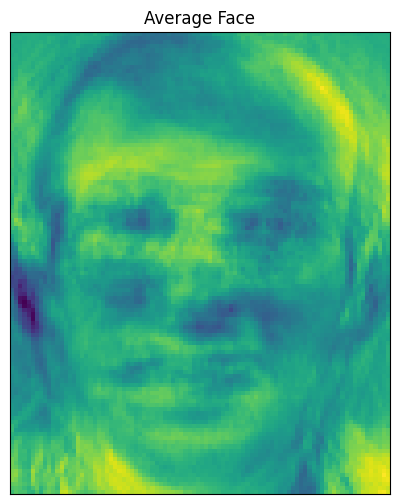

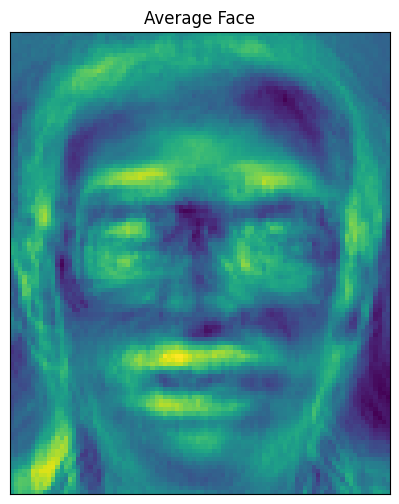

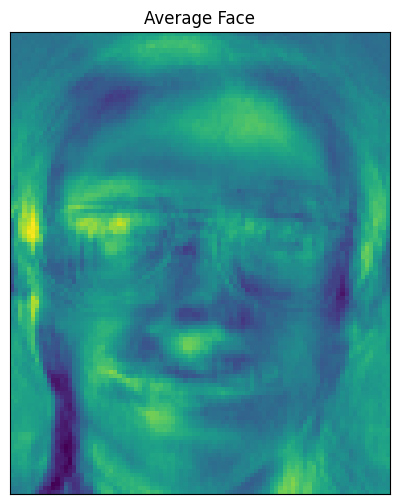

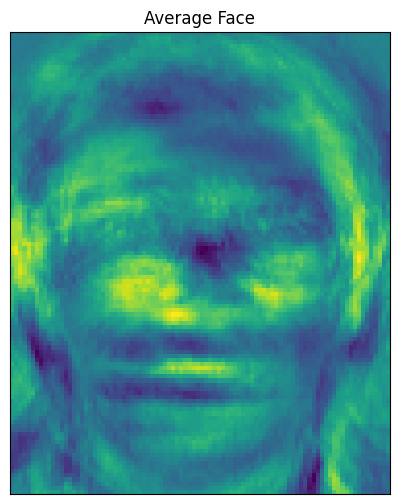

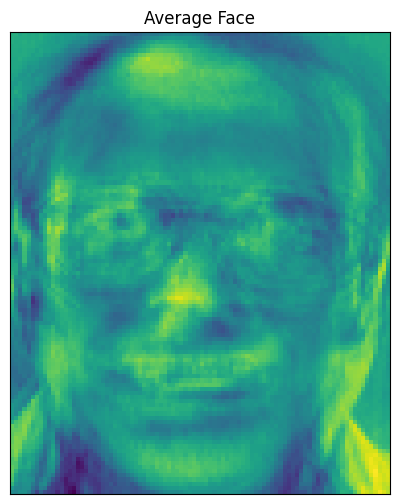

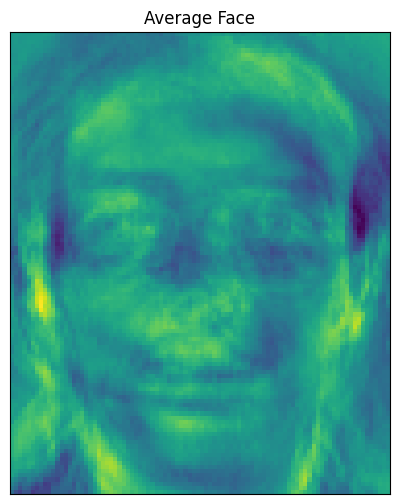

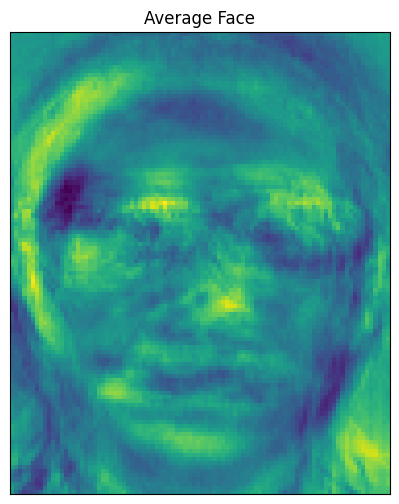

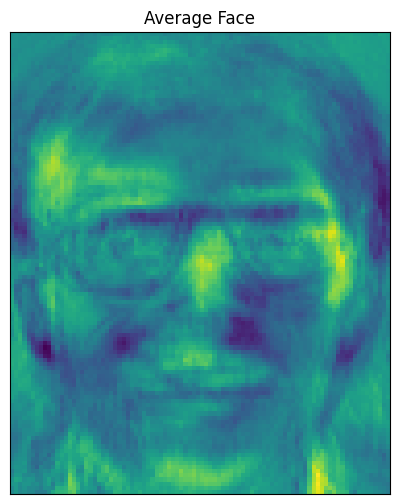

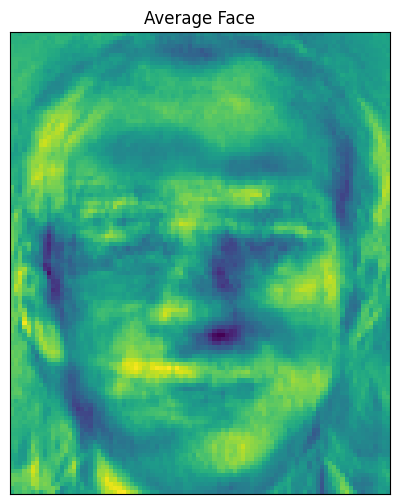

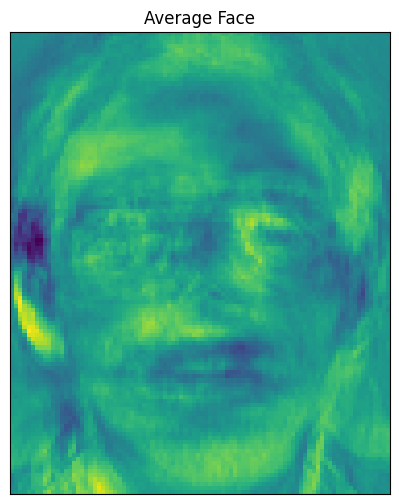

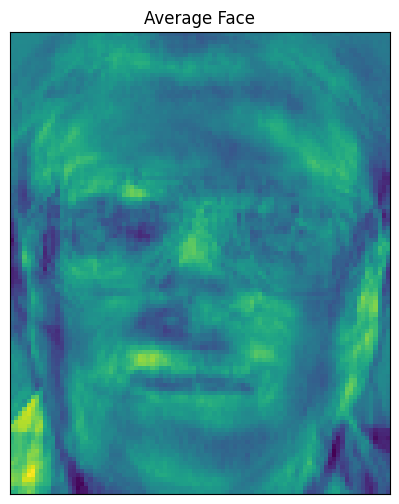

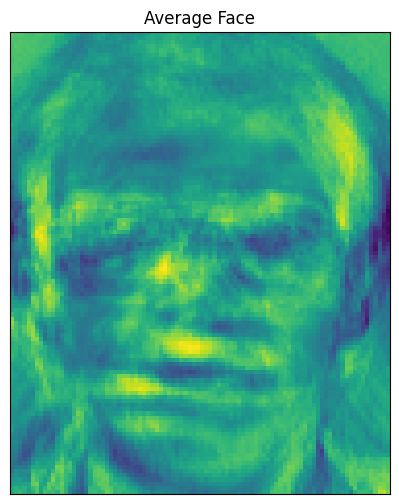

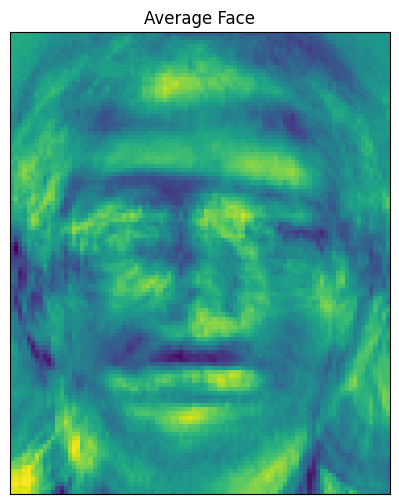

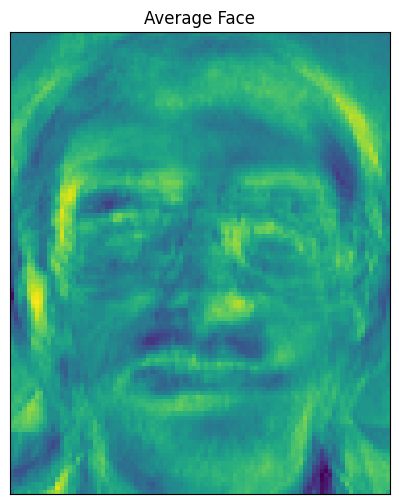

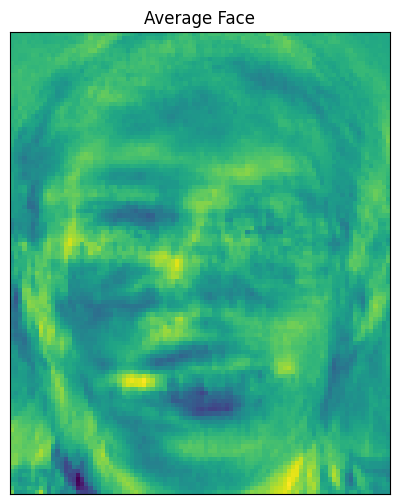

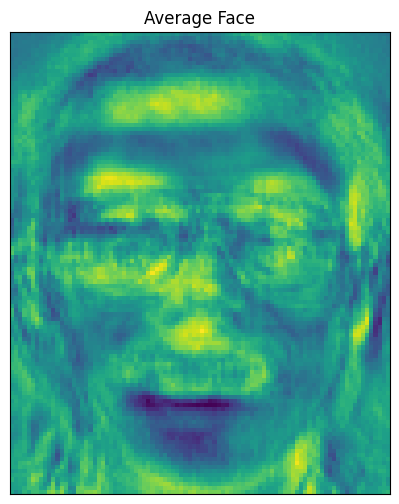

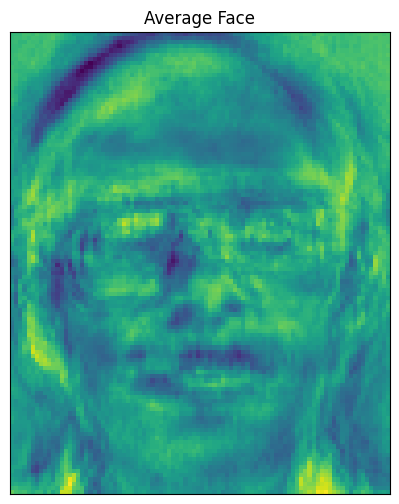

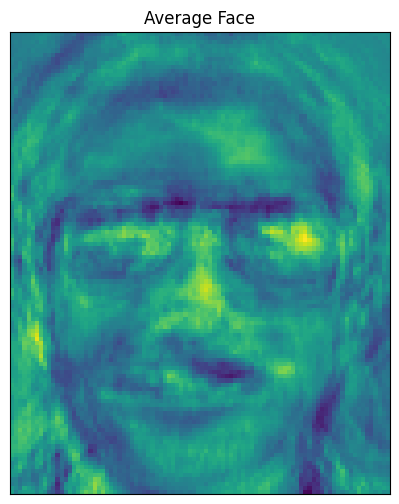

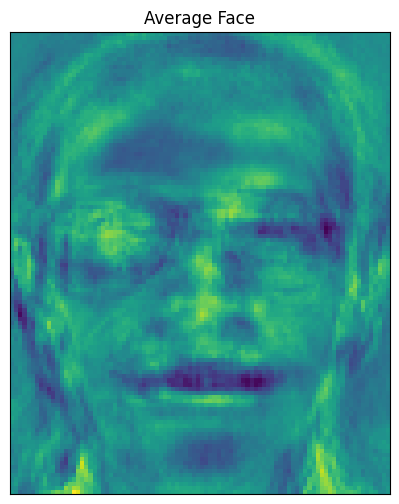

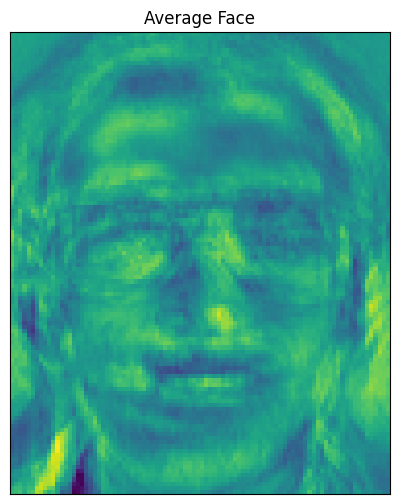

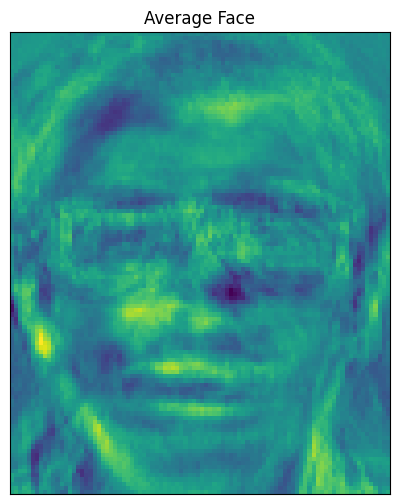

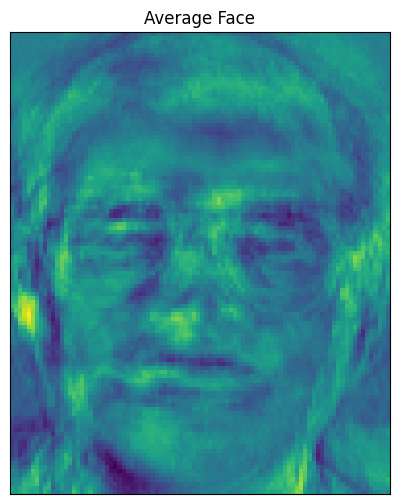

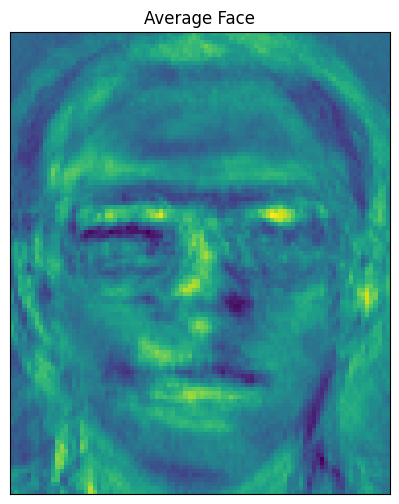

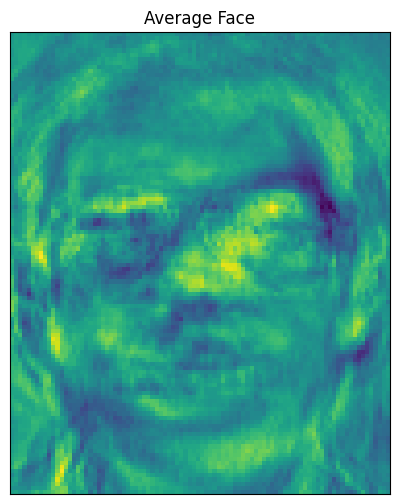

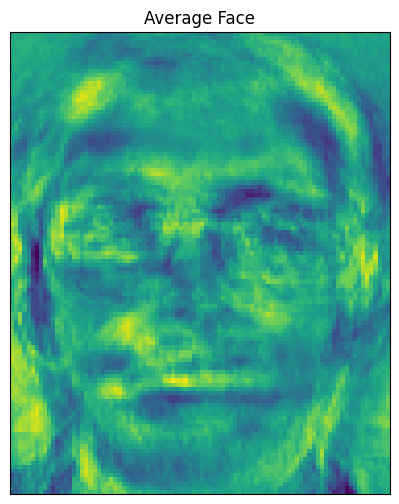

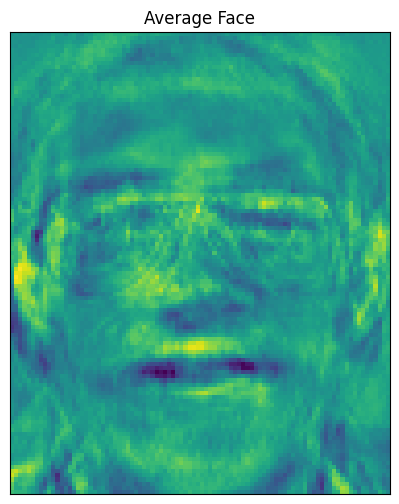

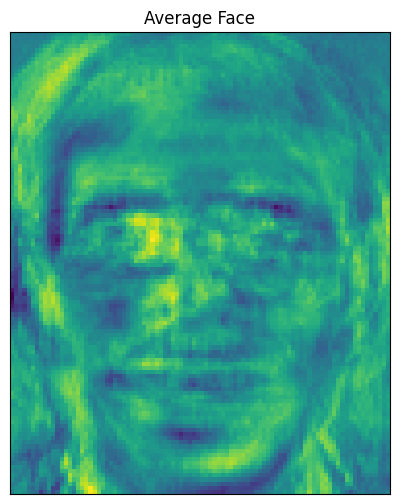

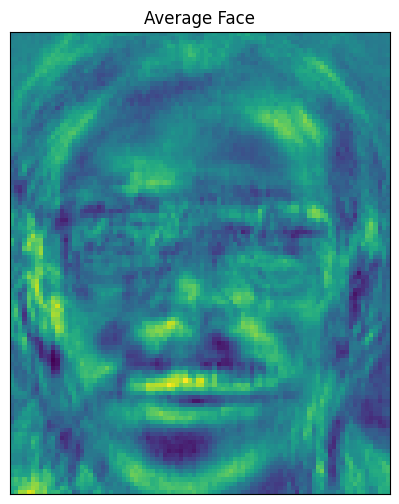

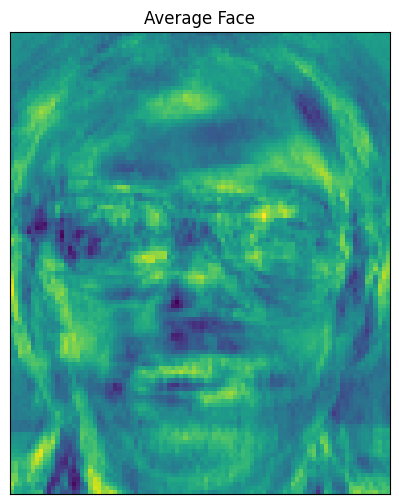

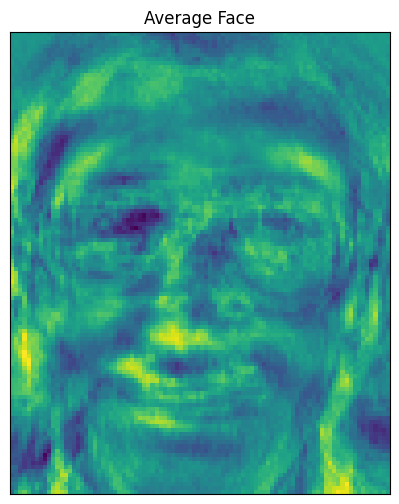

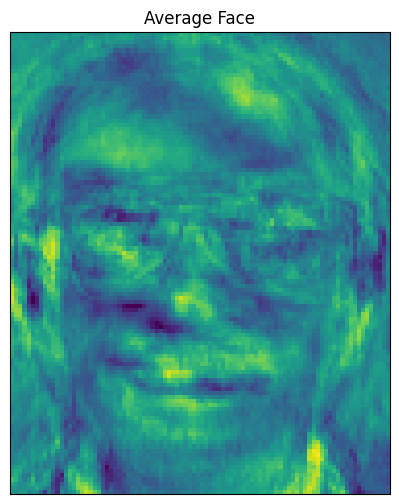

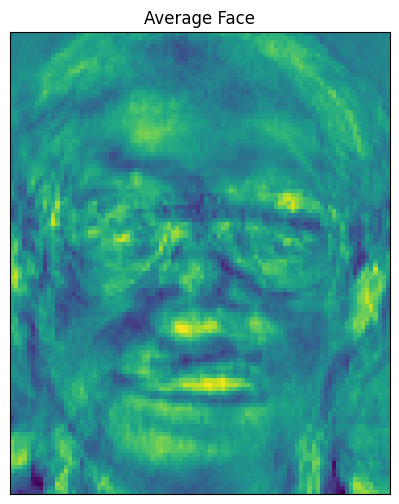

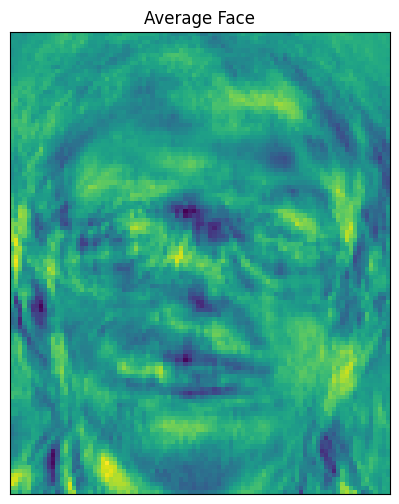

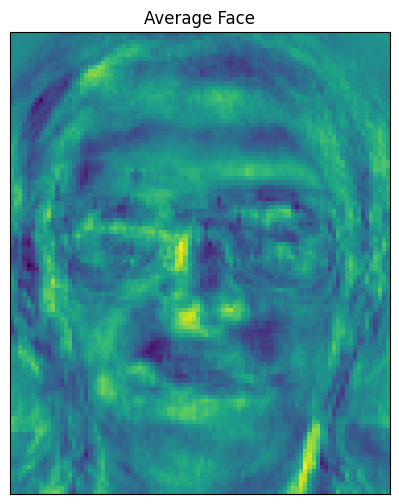

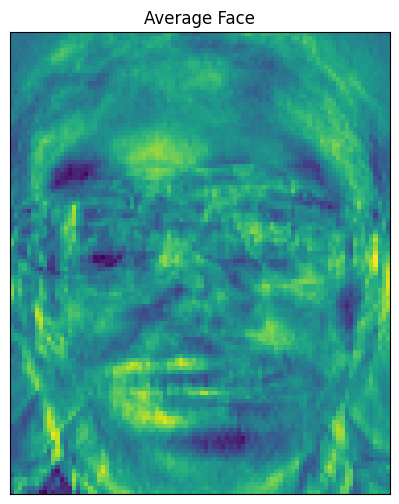

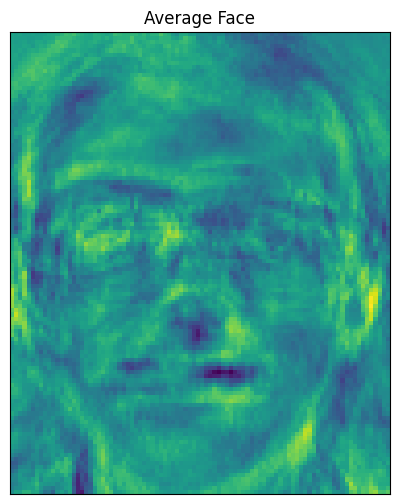

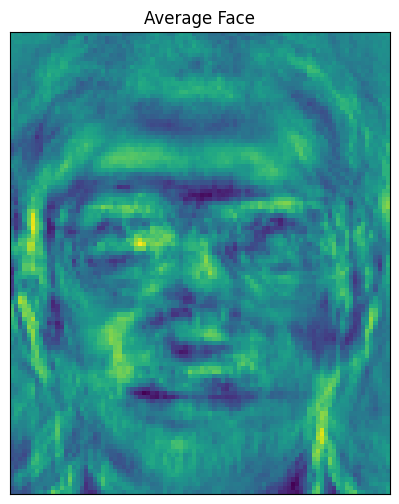

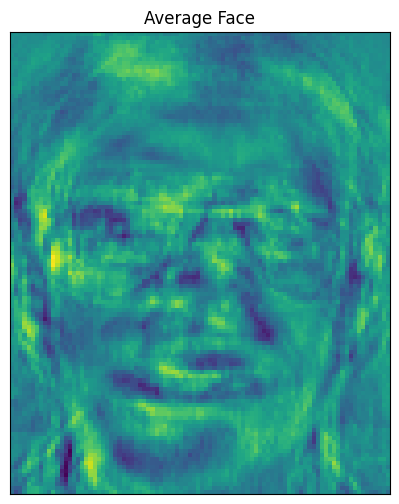

In [14]:
## Choosing the top 50
from matplotlib import pyplot
ef = topPrincipalComponents(eigen_values,eigen_faces,50)
tmp = 0
for img in range(0,ef.shape[1]):
    tf = ef[:,img]
    fig,ax=pyplot.subplots(1,1,figsize=(6,6))
    ax.imshow(tf.reshape((112,92)))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Average Face')

#### Visualisation

Face Number: 0


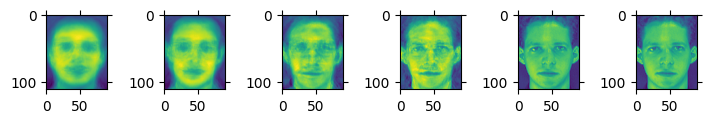

Face Number: 20


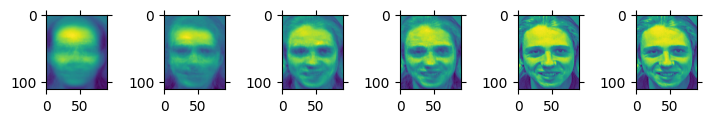

Face Number: 40


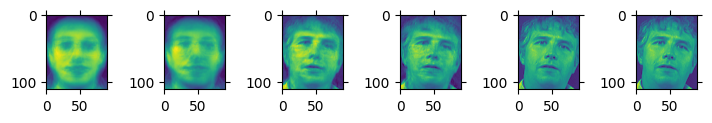

Face Number: 60


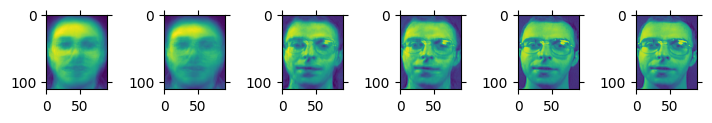

Face Number: 80


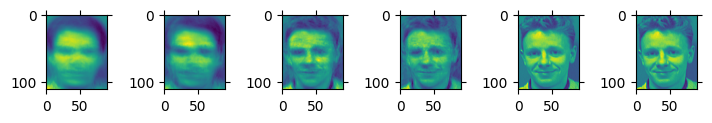

Face Number: 100


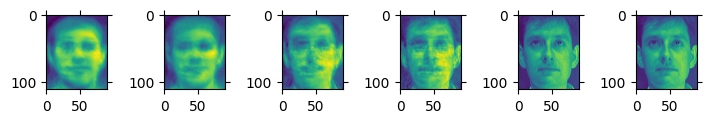

Face Number: 120


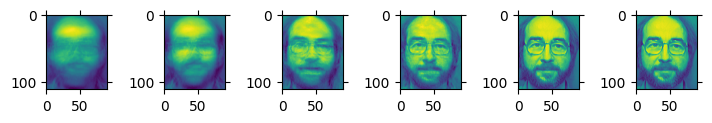

Face Number: 140


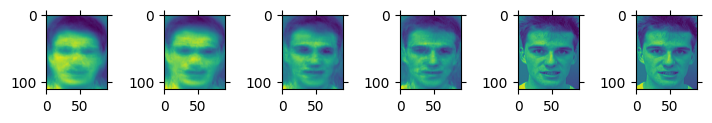

Face Number: 160


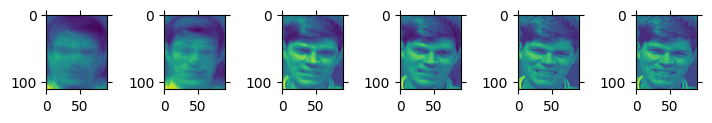

Face Number: 180


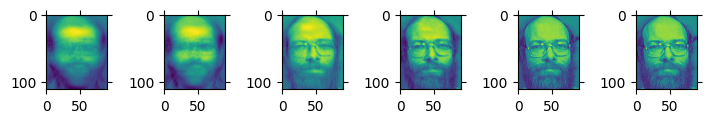

Face Number: 200


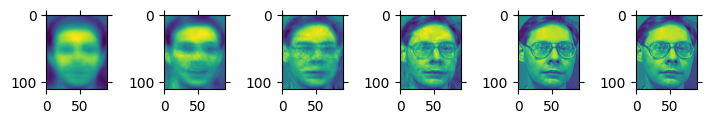

Face Number: 220


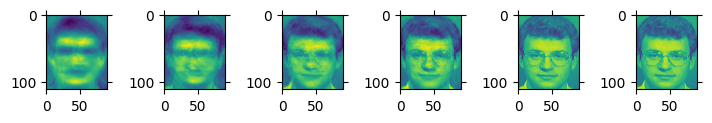

In [17]:
comp_values = [5,10,50,100,1000,10304]

count =0
while(count < len(X_train)):
    tmp = 0
    for j in range(len(comp_values)):
        ef = topPrincipalComponents(eigen_values,eigen_faces,comp_values[j])
        imageReconstruction(X_train[count,:].reshape(1,10304),all_means.reshape(1,10304),ef,Y_train,count,comp_values[j],j,tmp)
        tmp = tmp + 1
    count = count + 20

### Implement face recognition module based on the norm

In [21]:

def model(row,X_train,Y_train,ef,X_TrainDot,X_TestDot):

    minus = np.sqrt(np.sum((X_TrainDot - row)**2,axis=1))
    final_label = np.argmin(minus)
    min_dist = minus[final_label]
    return final_label,min_dist


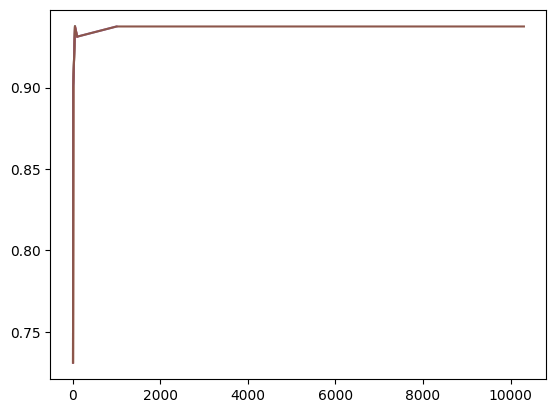

In [22]:

import math


## Iterating over rows of X_test
x_plots = []
y_plots = []

mean_x_plot = []
mean_y_plot = []

lmean_x_plot = []
lmean_y_plot = []

for j in range(len(comp_values)):
    ef = topPrincipalComponents(eigen_values,eigen_faces,comp_values[j])
    X_TrainDot =  np.matmul(X_train,ef)
    X_TestDot =   np.matmul(X_test,ef)
    flabels = []
    avg = 0
    for row in X_TestDot:
        final_label,errorValue = model(row,X_train,Y_train,ef,X_TrainDot,X_TestDot)
        flabels.append(Y_train[final_label])
        avg = avg + errorValue
    
    mean_x_plot.append(comp_values[j])
    mean_y_plot.append(avg/comp_values[j])
#     mean_y_plot.append(avg/len(X_TestDot))
    
    lmean_x_plot.append(comp_values[j])
    lmean_y_plot.append(math.log(avg/comp_values[j]))
    
    score = accuracy_score(Y_test,flabels)
    x_plots.append(comp_values[j])
    y_plots.append(score)
    plt.plot(x_plots,y_plots)
    
    
    
plt.show()